In [ ]:
from keras.datasets import fashion_mnist
import skimage.transform
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = np.array([skimage.transform.resize(image, (32, 32)) for image in np.expand_dims(x_train, -1)])
x_test = np.array([skimage.transform.resize(image, (32, 32)) for image in np.expand_dims(x_test, -1)])
y_train = y_train.astype('int')
y_test = y_test.astype('int')

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_test)]

In [ ]:
print('Train:', [x.shape[0] for x in train_groups])
print('Test:', [x.shape[0] for x in test_groups])

Train: [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
Test: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [ ]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            out_score += [1] * batch_halfsize
        else:
            # anything but the same group
            non_group_idx = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in group_idx]
            b_group_idx = non_group_idx
            out_score += [0]*batch_halfsize

        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)

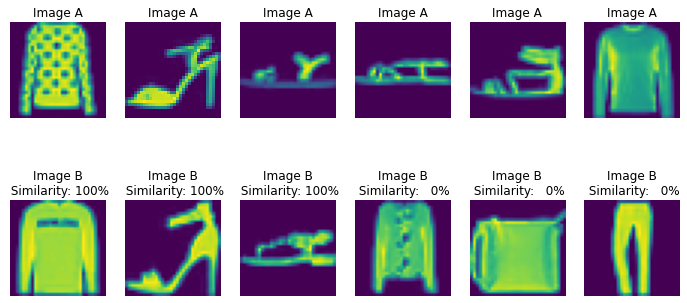

In [ ]:
import matplotlib.pyplot as plt

pv_a, pv_b, pv_sim = gen_random_batch(train_groups, 3)
fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
for c_a, c_b, c_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, m_axs.T):
    ax1.imshow(c_a[:,:,0])
    ax1.set_title('Image A')
    ax1.axis('off')
    ax2.imshow(c_b[:,:,0])
    ax2.set_title('Image B\n Similarity: %3.0f%%' % (100*c_d))
    ax2.axis('off')
plt.show()

In [ ]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-_0mkz7u8
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-_0mkz7u8
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 3.0 MB/s 
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20046 sha256=0ad2827147cc2daee92abfb490c3e9f4553f9f09fbf347b2a4dbf9a2f4cd1946
  Stored in directory: /tmp/pip-ephem-wheel-cache-2nv66iy6/wheels/0b/96/56/27b17c903efc647c51e4f364bfc20aa67f8d3dccad63c4fb4e
Successfully built image-classifiers


In [ ]:
%%time
from classification_models.keras import Classifiers
from keras.applications.mobilenet import MobileNet

ResNeXt50, preprocess_input = Classifiers.get('resnext50')
model = ResNeXt50(include_top = False, input_shape=(32, 32, 1), weights=None, classes=10)
# model = MobileNet(input_shape=(32, 32, 1), weights=None, classes=10)

CPU times: user 1.71 s, sys: 387 ms, total: 2.1 s
Wall time: 6.7 s


In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

In [ ]:
with tf.device('/device:GPU:0'):
  model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  history = model.fit(x_train, y_train, epochs = 8, batch_size = 16, validation_split = 0.2, verbose = 1)

Epoch 1/8
3000/3000 [==============================] - 88s 23ms/step - loss: 0.7923 - accuracy: 0.7297 - val_loss: 0.5284 - val_accuracy: 0.8082
Epoch 2/8
3000/3000 [==============================] - 65s 22ms/step - loss: 0.5259 - accuracy: 0.8197 - val_loss: 0.4487 - val_accuracy: 0.8489
Epoch 3/8
3000/3000 [==============================] - 63s 21ms/step - loss: 0.4643 - accuracy: 0.8412 - val_loss: 0.3994 - val_accuracy: 0.8600
Epoch 4/8
3000/3000 [==============================] - 64s 21ms/step - loss: 0.4058 - accuracy: 0.8606 - val_loss: 0.3686 - val_accuracy: 0.8708
Epoch 5/8
3000/3000 [==============================] - 63s 21ms/step - loss: 0.3496 - accuracy: 0.8791 - val_loss: 0.3530 - val_accuracy: 0.8797
Epoch 6/8
3000/3000 [==============================] - 63s 21ms/step - loss: 0.3131 - accuracy: 0.8887 - val_loss: 0.3254 - val_accuracy: 0.8815
Epoch 7/8
3000/3000 [==============================] - 63s 21ms/step - loss: 0.2895 - accuracy: 0.8981 - val_loss: 0.3115 - val_ac

In [ ]:
def distance(vectors):
    x, y = vectors
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

img_a_feat = model(tf.keras.layers.Input(shape = x_train.shape[1:], name='Image A input'))
img_b_feat = model(tf.keras.layers.Input(shape = x_train.shape[1:], name='Image B input'))

features = tf.keras.layers.Lambda(distance)([img_a_feat, img_b_feat])
features = tf.keras.layers.Dense(16, activation='relu')(features)
features = tf.keras.layers.BatchNormalization()(features)
features = tf.keras.layers.Activation('relu')(features)
features = tf.keras.layers.Dense(4, activation='relu')(features)
features = tf.keras.layers.BatchNormalization()(features)
features = tf.keras.layers.Activation('relu')(features)
features = tf.keras.layers.Dense(1, activation='sigmoid')(features)

siamese_model = tf.keras.models.Model(inputs = [img_a_feat, img_b_feat], outputs = [features], name = 'Siamese_model')
siamese_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mae'])
siamese_model.summary()

Model: "Siamese_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 lambda (Lambda)                (None, 1)            0           ['input_2[0][0]',                
                                                                  'input_3[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 16)           32          ['lambda[1][0]']     

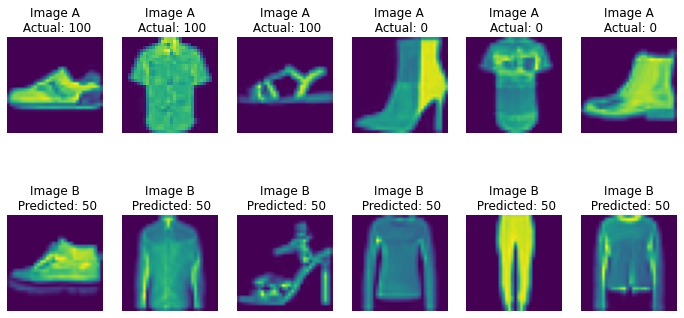

In [ ]:
def show_model_output(nb_examples = 3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = siamese_model.predict([model.predict(pv_a), model.predict(pv_b)])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0])
        ax1.set_title(f'Image A\n Actual: { 100 * c_d }')
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0])
        ax2.set_title(f'Image B\n Predicted: {int( 100 * p_d[0] )}')
        ax2.axis('off')
    return fig
# a completely untrained model
_ = show_model_output()

In [ ]:
def siam_gen(in_groups, batch_size = 32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(in_groups, batch_size//2)
        yield [model.predict(pv_a), model.predict(pv_b)], pv_sim

valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = siamese_model.fit(siam_gen(train_groups),
    steps_per_epoch = 500,
    validation_data=([model.predict(valid_a), model.predict(valid_b)], valid_sim),
    epochs = 2,
    verbose = True)

Epoch 1/2
500/500 [==============================] - 88s 174ms/step - loss: 0.3973 - mae: 0.2973 - val_loss: 0.3826 - val_mae: 0.2911
Epoch 2/2
500/500 [==============================] - 92s 185ms/step - loss: 0.2949 - mae: 0.2194 - val_loss: 0.3176 - val_mae: 0.2047


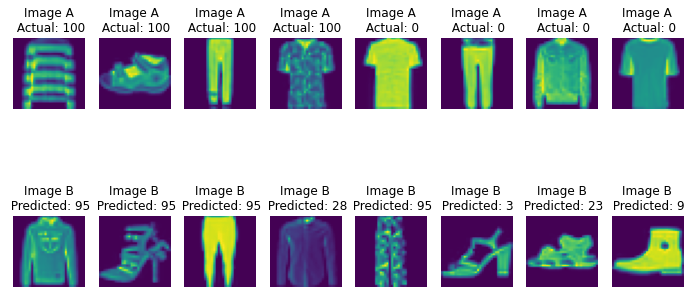

In [ ]:
_ = show_model_output(4)

79/79 [==============================] - 1s 6ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.012s...
[t-SNE] Computed neighbors for 10000 samples in 0.439s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.381832
[t-SNE] KL divergence after 500 iterations: 0.899907


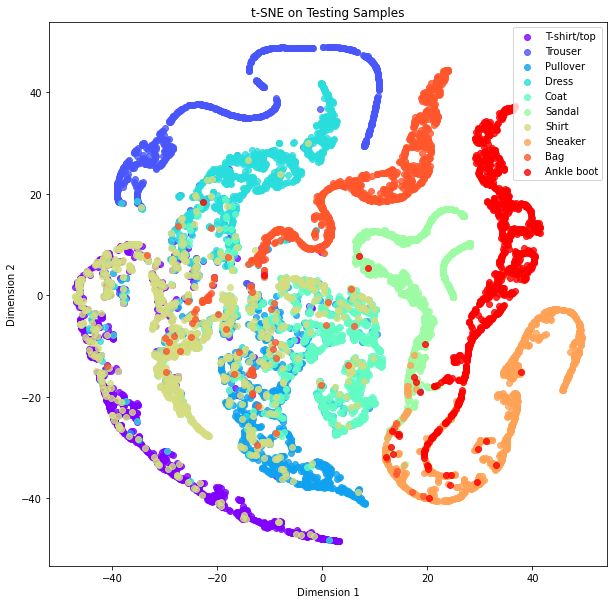

CPU times: user 1min 3s, sys: 344 ms, total: 1min 3s
Wall time: 34.2 s


In [ ]:
%%time
from sklearn.manifold import TSNE
x_test_features = model.predict(x_test, verbose = True, batch_size=128)

tsne_obj = TSNE(n_components=2,
    init='pca',
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=1)
tsne_features = tsne_obj.fit_transform(x_test_features)
obj_categories = [  
                    'T-shirt/top','Trouser','Pullover','Dress',
                    'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'
                 ]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(tsne_features[np.where(y_test == c_group), 0],
        tsne_features[np.where(y_test == c_group), 1],
        marker='o',
        color=c_color,
        linewidth=1,
        alpha=0.8,
        label=c_label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on Testing Samples')
plt.legend(loc='best')
plt.savefig('clothes-dist.png')
plt.show(block=False)